<a href="https://colab.research.google.com/github/SirvavialTAG/MachineLearning/blob/main/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# МЛ практика 5. Задача регрессии

## **Цель занятия:**
Изучить задачу регрессии, познакомиться с метриками качества, реализовать модель для решения задачи с использованием разных моделей.

## **Задание состоит из следующих частей:**
1. Понимание значимости отбора признаков
2. Обучение регрессии
3. Метирки качества для регресии (только самые важные)
4. Регулязризация

## Задачи для домашки ⏰

1. Выбрать y = непрерывная переменая
2. Разделить на обучающую, тестовую и валидационную выборки
3. Выбрать лучшие признаки для X и выбрать лучший результат
4. Объяснить результаты метрик качества MAE, MSE, R2

**Для 👽**
5. Попробовать модель ```KNeighborsRegressor```, объяснить как работает модель, объяснить результат
6. Попробовать модель ```DecisionTreeRegressor```, объяснить как работает модель, объяснить результат

In [1]:
! pip install pandas scikit-learn seaborn scipy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Загрузка набора данных
df = pd.read_csv('bank.csv')

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  deposit    45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
y = df['age'] # выбираем целевую переменную (количественная)
X = df.drop('age', axis=1) # переменные для проверки влияния

# Переводим столбцы с типом данных 'object' в тип данных 'category'
for col in X.columns:
  if X[col].dtype == 'object':
    X[col] = X[col].astype('category')

In [6]:
X

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   job        45211 non-null  category
 1   marital    45211 non-null  category
 2   education  45211 non-null  category
 3   default    45211 non-null  category
 4   balance    45211 non-null  int64   
 5   housing    45211 non-null  category
 6   loan       45211 non-null  category
 7   contact    45211 non-null  category
 8   day        45211 non-null  int64   
 9   month      45211 non-null  category
 10  duration   45211 non-null  int64   
 11  campaign   45211 non-null  int64   
 12  pdays      45211 non-null  int64   
 13  previous   45211 non-null  int64   
 14  poutcome   45211 non-null  category
 15  deposit    45211 non-null  category
dtypes: category(10), int64(6)
memory usage: 2.5 MB


In [8]:
# Создаем копию данных
category_columns: list[str] = X.select_dtypes(include=['category']).columns # собираем колонки помеченные как category

# Применяем One-Hot Encoding к категориальным столбцам, исключая первую категорию (drop_first=True)
X = pd.get_dummies(X, columns=category_columns,drop_first=True)

In [9]:
X

,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,deposit_yes
0,2143,5,261,1,-1,0,False,False,False,True,...,False,False,True,False,False,False,False,False,True,False
1,29,5,151,1,-1,0,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
2,2,5,76,1,-1,0,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,1506,5,92,1,-1,0,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
4,1,5,198,1,-1,0,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,825,17,977,3,-1,0,False,False,False,False,...,False,False,False,True,False,False,False,False,True,True
45207,1729,17,456,2,-1,0,False,False,False,False,...,False,False,False,True,False,False,False,False,True,True
45208,5715,17,1127,5,184,3,False,False,False,False,...,False,False,False,True,False,False,False,True,False,True
45209,668,17,508,4,-1,0,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False


In [10]:
# Создаем копию данных
df_corr_test = X.copy()

# Добавляем целевую переменную в копию данных
df_corr_test['y'] = y
df_corr_test

,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,deposit_yes,y
0,2143,5,261,1,-1,0,False,False,False,True,...,False,True,False,False,False,False,False,True,False,58
1,29,5,151,1,-1,0,False,False,False,False,...,False,True,False,False,False,False,False,True,False,44
2,2,5,76,1,-1,0,False,True,False,False,...,False,True,False,False,False,False,False,True,False,33
3,1506,5,92,1,-1,0,True,False,False,False,...,False,True,False,False,False,False,False,True,False,47
4,1,5,198,1,-1,0,False,False,False,False,...,False,True,False,False,False,False,False,True,False,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,825,17,977,3,-1,0,False,False,False,False,...,False,False,True,False,False,False,False,True,True,51
45207,1729,17,456,2,-1,0,False,False,False,False,...,False,False,True,False,False,False,False,True,True,71
45208,5715,17,1127,5,184,3,False,False,False,False,...,False,False,True,False,False,False,True,False,True,72
45209,668,17,508,4,-1,0,True,False,False,False,...,False,False,True,False,False,False,False,True,False,57


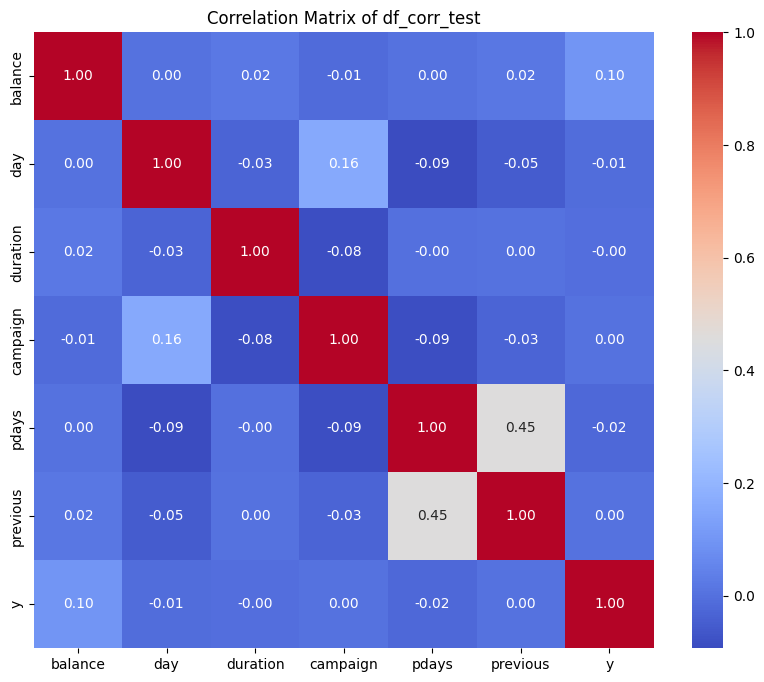

In [11]:
# Предположим, что у нас уже есть DataFrame под названием df_corr_test
# Выводим матрицу корреляции (только для числовых столбцов)
correlation_matrix = df_corr_test.select_dtypes(['int']).corr()

# Отображаем матрицу корреляции с помощью тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of df_corr_test")
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def resolve_regression(X, y, regularization=None):
    """
    Выполняет регрессию с учетом регуляризации.

    Parameters:
    - X: Входные данные (признаки).
    - y: Целевые значения.
    - regularization: Тип регуляризации ('l1', 'l2', None). Если None, используется обычная линейная регрессия.
    """
    # Разделение данных на обучающую и тестовую выборки (80% / 20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Инициализация модели в зависимости от типа регуляризации
    if regularization == 'l1':
        model = Lasso() # L1-регуляризация (Lasso)
    elif regularization == 'l2':
        model = Ridge() # L2-регуляризация (Ridge)
    else:
        model = LinearRegression() # Линейная регрессия без регуляризации

    # Обучение модели
    model.fit(X_train, y_train)

    # Предсказание на тестовой выборке
    y_pred = model.predict(X_test)

    # Вычисление метрик качества
    mae = mean_absolute_error(y_test, y_pred) # Средняя абсолютная ошибка
    mse = mean_squared_error(y_test, y_pred)  # Средняя квадратичная ошибка
    r2 = r2_score(y_test, y_pred)             # Коэффициент детерминации (R^2)

    # Вывод результатов
    print(f"Regularization: {regularization}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}")

    return model, X_train, X_test, y_train, y_test

In [13]:
resolve_regression(X, y)
None

Regularization: None
Mean Absolute Error (MAE): 6.55
Mean Squared Error (MSE): 65.23
R^2 Score: 0.42


**При использовании числовых признаков коэффицент детерминации (R^2) показывает значение 0,42. Это нормально.**





In [14]:
# Попытаем удачу с булевыми признаками
boolean_columns = X.select_dtypes(include='bool').columns

for column in boolean_columns:
  X_subset = X[[column]]

  print("--", column, "--")
  resolve_regression(X_subset, y)
  print('')

-- job_blue-collar --
Regularization: None
Mean Absolute Error (MAE): 8.72
Mean Squared Error (MSE): 112.63
R^2 Score: 0.00

-- job_entrepreneur --
Regularization: None
Mean Absolute Error (MAE): 8.71
Mean Squared Error (MSE): 112.78
R^2 Score: 0.00

-- job_housemaid --
Regularization: None
Mean Absolute Error (MAE): 8.69
Mean Squared Error (MSE): 112.32
R^2 Score: 0.00

-- job_management --
Regularization: None
Mean Absolute Error (MAE): 8.71
Mean Squared Error (MSE): 112.68
R^2 Score: 0.00

-- job_retired --
Regularization: None
Mean Absolute Error (MAE): 7.89
Mean Squared Error (MSE): 89.89
R^2 Score: 0.20

-- job_self-employed --
Regularization: None
Mean Absolute Error (MAE): 8.72
Mean Squared Error (MSE): 112.79
R^2 Score: -0.00

-- job_services --
Regularization: None
Mean Absolute Error (MAE): 8.71
Mean Squared Error (MSE): 112.44
R^2 Score: 0.00

-- job_student --
Regularization: None
Mean Absolute Error (MAE): 8.51
Mean Squared Error (MSE): 107.71
R^2 Score: 0.05

-- job_tech

In [15]:
# Используем отобранные признаки со значение R^2 больше нуля
resolve_regression(X[['job_retired', 'job_student', 'marital_married', 'housing_yes', 'education_tertiary', 'contact_telephone']], y)
None

Regularization: None
Mean Absolute Error (MAE): 7.14
Mean Squared Error (MSE): 75.85
R^2 Score: 0.33


**При использовании булевых признаков коэффицент детерминации (R^2) показывает значение 0,33. По сравнению с первым результатом, это ухудшение.**

In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   balance              45211 non-null  int64
 1   day                  45211 non-null  int64
 2   duration             45211 non-null  int64
 3   campaign             45211 non-null  int64
 4   pdays                45211 non-null  int64
 5   previous             45211 non-null  int64
 6   job_blue-collar      45211 non-null  bool 
 7   job_entrepreneur     45211 non-null  bool 
 8   job_housemaid        45211 non-null  bool 
 9   job_management       45211 non-null  bool 
 10  job_retired          45211 non-null  bool 
 11  job_self-employed    45211 non-null  bool 
 12  job_services         45211 non-null  bool 
 13  job_student          45211 non-null  bool 
 14  job_technician       45211 non-null  bool 
 15  job_unemployed       45211 non-null  bool 
 16  job_unknown          4

**Отбор признаков по корреляции**

In [17]:
def select_features_correlation(X, y, max_features=5):
    # Вычисляем корреляцию признаков с целевой переменной
    correlation = X.apply(lambda col: np.abs(col.corr(y)))

    # Отбираем top-N признаков с наибольшей корреляцией
    top_features = correlation.nlargest(max_features).index

    # Возвращаем X и y с отобранными признаками
    return X[top_features], y

**Отбор признаков с помощью RFE (Recursive Feature Elimination)**

In [18]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

def select_features_rfe(X, y, max_features=5):
    # Инициализация модели линейной регрессии
    model = LinearRegression()

    # RFE с указанным количеством признаков
    selector = RFE(model, n_features_to_select=max_features)
    selector = selector.fit(X, y)

    # Отбор признаков
    selected_features = X.columns[selector.support_]

    # Возвращаем X и y с отобранными признаками
    return X[selected_features], y

In [19]:
# Используем отбор на основе корреляции
X_selected_corr, y_selected_corr = select_features_correlation(X, y, max_features=5)

# Используем отбор с помощью RFE
X_selected_rfe, y_selected_rfe = select_features_rfe(X, y, max_features=5)

In [20]:
resolve_regression(X_selected_corr, y_selected_corr)
None

Regularization: None
Mean Absolute Error (MAE): 6.78
Mean Squared Error (MSE): 69.44
R^2 Score: 0.38


**Коэффицент детерминации (R^2) показывает значение 0,38. Это лучше регрессии, использующей булевые признаки, но хуже той, что использует числовые признаки.**

In [21]:
resolve_regression(X_selected_rfe, y_selected_rfe)
None

Regularization: None
Mean Absolute Error (MAE): 6.82
Mean Squared Error (MSE): 70.36
R^2 Score: 0.38


**Здесь никаких существенных различий от отбора признаков по корреляции не обнаружено.**

Regularization: None
Mean Absolute Error (MAE): 6.82
Mean Squared Error (MSE): 70.36
R^2 Score: 0.38


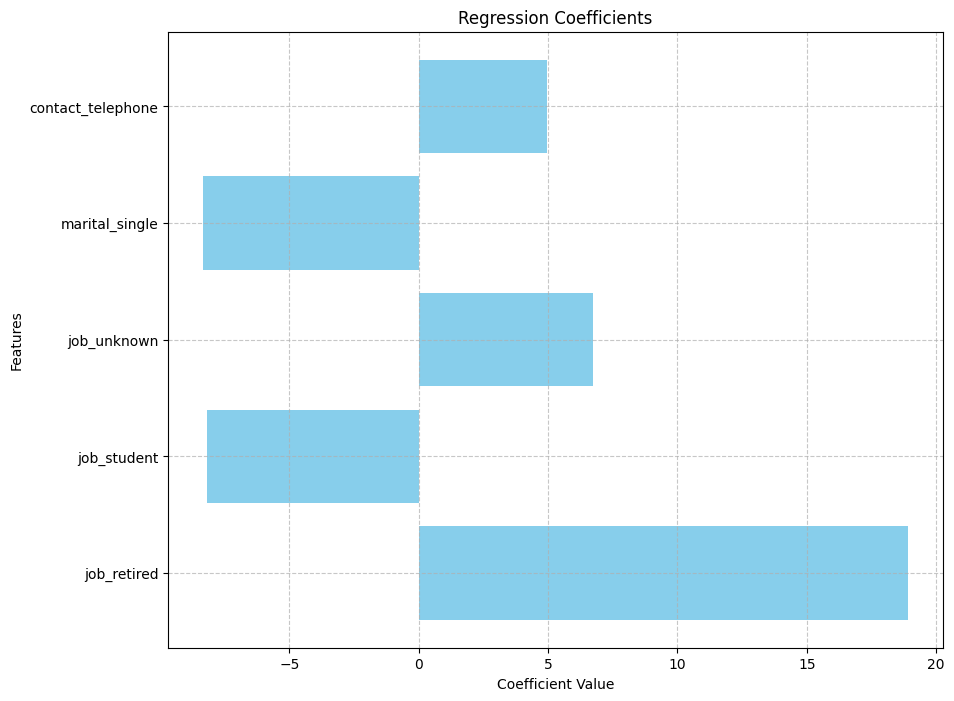

In [22]:
import matplotlib.pyplot as plt

def plot_regression_coefficients(model, feature_names):
    # Извлекаем коэффициенты регрессии
    coefficients = model.coef_

    # Создаем столбчатую диаграмму для визуализации коэффициентов
    plt.figure(figsize=(10, 8))
    plt.barh(feature_names, coefficients, color='skyblue')
    plt.xlabel("Coefficient Value")
    plt.ylabel("Features")
    plt.title("Regression Coefficients")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Пример использования:
# Сначала выполним линейную регрессию
model, X_train, X_test, y_train, y_test = resolve_regression(X_selected_rfe, y_selected_rfe, None)

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X_selected_rfe.columns)

На графике отображены коэффициенты линейной регрессии для различных признаков. Коэффициенты показывают вклад каждого признака в модель. Наибольшее влияние на модель оказывают признаки `job_retired` и `job_unknown`.

Метрики модели:
- **MAE** (Средняя абсолютная ошибка): 6.82 — средняя разница между предсказанными и фактическими значениями.
- **MSE** (Среднеквадратичная ошибка): 70.36 — средняя квадратичная ошибка, чувствительна к большим ошибкам.
- **R²** (Коэффициент детерминации): 0.38 — модель объясняет 38% дисперсии данных, что указывает на высокую точность.

**Дисперсия** — это мера разброса значений целевой переменной. Она показывает, насколько данные отклоняются от среднего.

**Коэффициент детерминации**
𝑅2 = 0.38 означает, что модель объясняет 38% вариации данных. Это значит, что 38% разброса в значениях целевой переменной модель смогла предсказать, а 62% остаются необъясненными (шум или неизвестные факторы).

In [23]:
X_selected_rfe

,job_retired,job_student,job_unknown,marital_single,contact_telephone
0,False,False,False,False,False
1,False,False,False,True,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,True,True,False
...,...,...,...,...,...
45206,False,False,False,False,False
45207,True,False,False,False,False
45208,True,False,False,False,False
45209,False,False,False,False,True


## Пару слов про метрики

In [24]:
# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик качества
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Вывод метрик
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Absolute Error (MAE): 6.82
Mean Squared Error (MSE): 70.36
R^2 Score: 0.38


## Регуляризация

In [25]:
X

,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,deposit_yes
0,2143,5,261,1,-1,0,False,False,False,True,...,False,False,True,False,False,False,False,False,True,False
1,29,5,151,1,-1,0,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
2,2,5,76,1,-1,0,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,1506,5,92,1,-1,0,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
4,1,5,198,1,-1,0,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,825,17,977,3,-1,0,False,False,False,False,...,False,False,False,True,False,False,False,False,True,True
45207,1729,17,456,2,-1,0,False,False,False,False,...,False,False,False,True,False,False,False,False,True,True
45208,5715,17,1127,5,184,3,False,False,False,False,...,False,False,False,True,False,False,False,True,False,True
45209,668,17,508,4,-1,0,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False


1. **L1-регуляризация (Lasso)**:
   Формула для L1-регуляризации добавляет штраф, который равен сумме абсолютных значений весов модели. Это может привести к обнулению некоторых весов, то есть к выбору только наиболее значимых признаков.

   Формула для L1-регуляризации:
   J(θ) = Функция потерь + λ * Σ|θ_i|

   где:
   - J(θ) — общая функция потерь с регуляризацией,
   - Функция потерь — это функция, измеряющая ошибку модели (например, среднеквадратическая ошибка),
   - λ — коэффициент регуляризации, который контролирует степень штрафа,
   - Σ|θ_i| — сумма абсолютных значений всех весов модели (θ_i).

2. **L2-регуляризация (Ridge)**:
   Формула для L2-регуляризации добавляет штраф, который равен сумме квадратов весов модели. Это не обнуляет веса, но снижает их величину, что приводит к более простым и менее подверженным переобучению моделям.

   Формула для L2-регуляризации:
   J(θ) = Функция потерь + λ * Σθ_i^2

   где:
   - J(θ) — общая функция потерь с регуляризацией,
   - Σθ_i^2 — сумма квадратов всех весов модели (θ_i).

3. **Elastic Net**:
   Это комбинированный метод, который использует и L1-штраф, и L2-штраф. Он полезен, когда нужно балансировать преимущества обоих методов.

   Формула для Elastic Net:
   J(θ) = Функция потерь + λ_1 * Σ|θ_i| + λ_2 * Σθ_i^2

   где:
   - λ_1 и λ_2 — коэффициенты регуляризации для L1 и L2 частей соответственно.

Регуляризация помогает улучшить обобщающую способность модели и предотвращает её переобучение.

Regularization: l1
Mean Absolute Error (MAE): 7.97
Mean Squared Error (MSE): 96.29
R^2 Score: 0.15


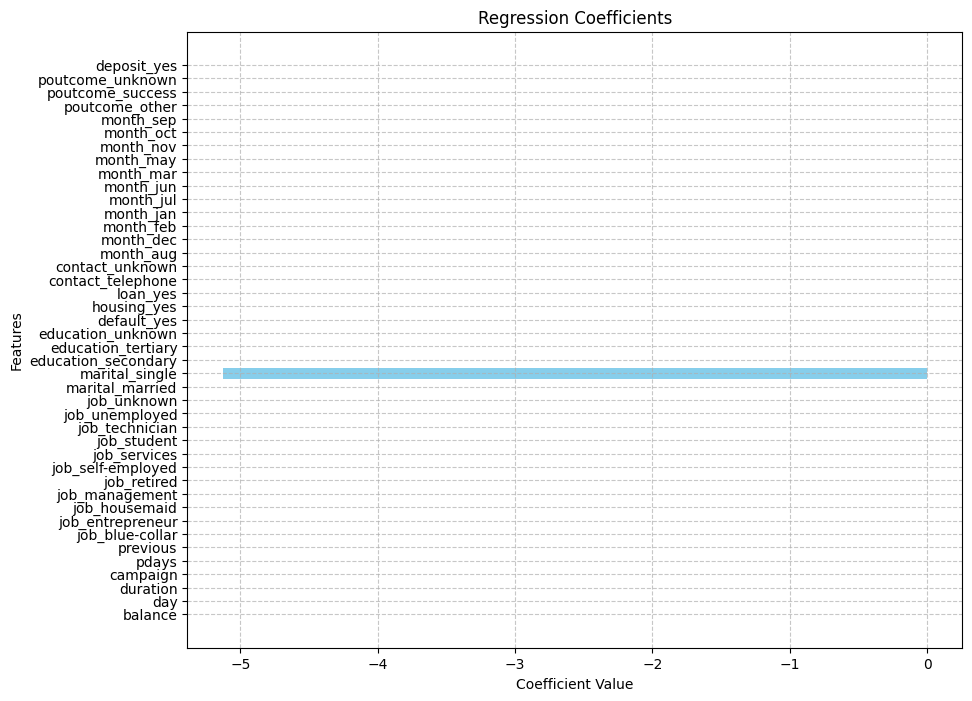

In [26]:
# L1-регуляризация
model, _, _, _, _ = resolve_regression(X, y, regularization='l1')
None

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X.columns)

Regularization: l2
Mean Absolute Error (MAE): 6.55
Mean Squared Error (MSE): 65.23
R^2 Score: 0.42


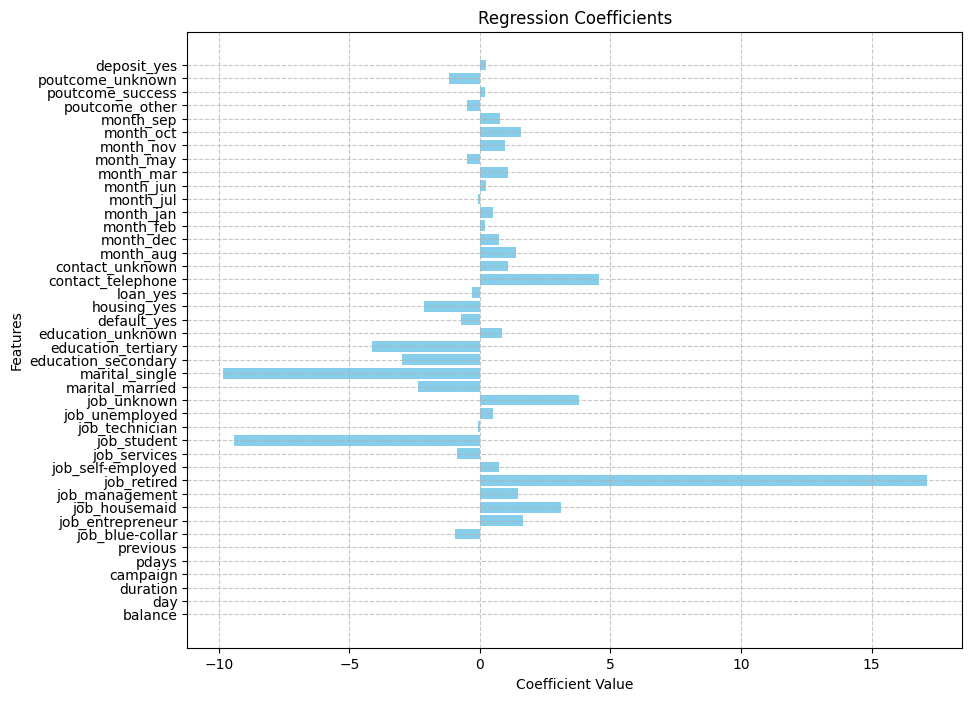

In [27]:
# L2-регуляризация
model, _, _, _, _ = resolve_regression(X, y, regularization='l2')
None

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X.columns)

Regularization: None
Mean Absolute Error (MAE): 6.55
Mean Squared Error (MSE): 65.23
R^2 Score: 0.42


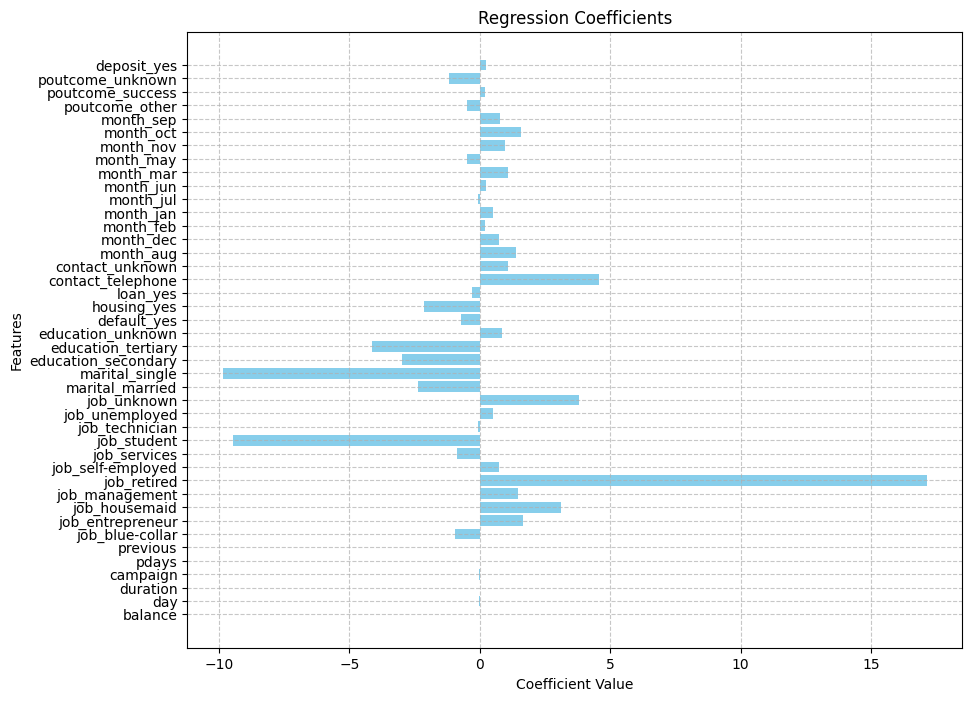

In [28]:
# Без регуляризации
model, _, _, _, _  = resolve_regression(X, y, regularization=None)
None

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X.columns)

**Удивительно, но метрики модели с регуляризацией L2 и модели без регуляризации оказались одинаковыми. А вот показатели модели с регуляризацией L1 значительно уступают по точности по сравнению с другими результатами.**

## KNeighborsRegressor

KNeighborsRegressor  – это алгоритм машинного обучения, используемый для решения задач регрессии. Он основан на идее, что похожие объекты должны иметь похожие значения целевой переменной.

Работа алгоритма можно разбить на следующие этапы:

**1.** Алгоритм принимает на вход обучающие данные (признаки объектов и целевую переменную).

**2.** Выбор параметра k, который определяет количество ближайших соседей, которые будут использоваться для предсказания. Выбор оптимального значения k зависит от конкретной задачи и данных. Большие значения k делают модель менее чувствительной к шуму, но могут привести к усреднению и потере локальных особенностей данных. Малые значения k делают модель более гибкой, но более чувствительной к выбросам.

**3.** Для нового объекта, для которого нужно сделать предсказание, алгоритм вычисляет расстояние между его вектором признаков и векторами признаков всех объектов из обучающей выборки.

**4.** Алгоритм выбирает k объектов из обучающей выборки, имеющих наименьшее расстояние до нового объекта.

**5.** Значение целевой переменной для нового объекта предсказывается на основе значений целевой переменной его k ближайших соседей. В KNeighborsRegressor это обычно делается путем усреднения значений целевой переменной соседей.

In [29]:
from sklearn.neighbors import KNeighborsRegressor

# Разделение данных на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Применение KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=100, weights='distance')
knn_model.fit(X_train, y_train)

# Выполнение предсказаний
y_pred = knn_model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Вывод метрик
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R2: {r2}')

Mean Absolute Error: 8.675017117926306
Mean Squared Error: 111.83672217798042
R2: 0.008459467179813829


k = 5
* Mean Absolute Error: 9.270165195235231
* Mean Squared Error: 132.5858562365019
* R2: -0.17550164183053774


k = 18
* Mean Absolute Error: 8.819682571551537
* Mean Squared Error: 117.37493417988576
* R2: -0.040642129972696006

k = 30
* Mean Absolute Error: 8.748879925907916
* Mean Squared Error: 114.5263254967407
* R2: -0.015386463350181456

k = 42
* Mean Absolute Error: 8.7212208263503
* Mean Squared Error: 113.40171167878994
* R2: -0.005415675915145357

k = 100
* Mean Absolute Error: 8.675017117926306
* Mean Squared Error: 111.83672217798042
* R2: 0.008459467179813829

**Вывод** - на мой взгляд, алгоритм KNeighborsRegressor не продемонстрировал впечатляющих результатов на данном наборе данных.

# DecisionTreeRegressor

DecisionTreeRegressor строит древовидную структуру для предсказания непрерывных значений целевой переменной.

Алгоритм работает следующим образом:

**1.** Начиная с корня, данные рекурсивно разбиваются на подмножества на основе значения признака, минимизирующего разброс целевой переменной в получившихся подмножествах. Разброс обычно измеряется с помощью среднеквадратичной ошибки (MSE).

**2.** Для выбора оптимального признака и точки разбиения используются различные критерии, такие как уменьшение MSE.

**3.** Процесс разбиения останавливается, когда достигается заданная максимальная глубина дерева (max_depth), минимальное количество образцов для разбиения (min_samples_split) или минимальное количество образцов в листе (min_samples_leaf).

**4.** Каждый лист дерева представляет собой конечное подмножество данных. Предсказание для нового объекта, попавшего в данный лист, вычисляется как среднее значение целевой переменной для объектов из этого подмножества.

In [33]:
from sklearn.tree import DecisionTreeRegressor

# Разделение данных на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Применение DecisionTreeRegressor
dtr_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dtr_model.fit(X_train, y_train)

# Выполнение предсказаний
y_pred = knn_model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Вывод метрик
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R2: {r2}')

Mean Absolute Error: 8.675017117926306
Mean Squared Error: 111.83672217798042
R2: 0.008459467179813829


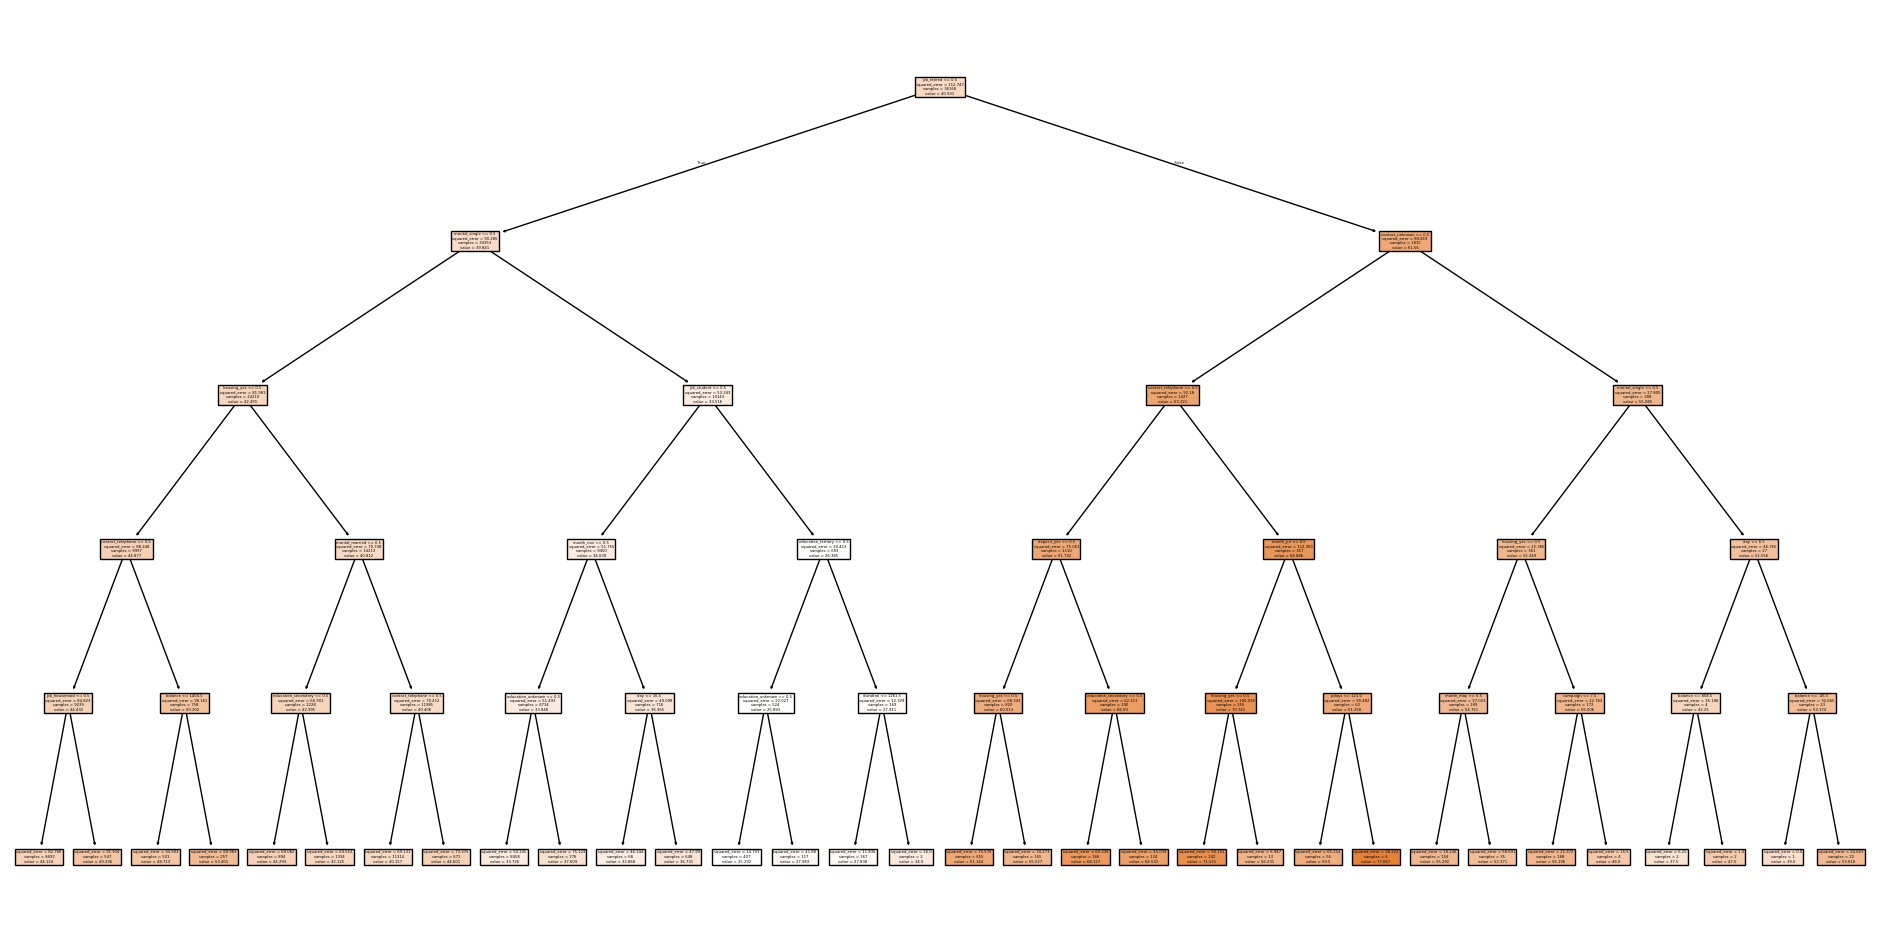

In [34]:
from sklearn.tree import plot_tree

plt.figure(figsize=(24, 12))
plot_tree(dtr_model, feature_names=X.columns, filled=True)
plt.show()